In [1]:
from pymemcache.client import base
import json

In [2]:
base_client = base.Client(("localhost", 11211))

In [4]:
base_client.get("0")

b'{"x": 0.0, "y": 0.0, "z": 0.0, "time": "16-36-657301"}'

In [16]:
data_arr = []
for cc in range(0,1000000):
    the_data=base_client.get(f"{cc}")
    if the_data is None:
        break
    data_arr.append(the_data)
print(last_data)

b'{"x": -0.95166015625, "y": -0.0751953125, "z": -0.014404296875, "time": "02-45-746971"}'


In [17]:
len(data_arr)

658

In [5]:
def get_stream_data(num):
    current_str = base_client.get("current")
    current = (int(current_str))
    ret = []
    for i in range(current-num,current):
        ret.append(json.loads(base_client.get(f"{i}")))
    return ret
    




In [6]:
base_client.get("current")

b'63813'

In [7]:
the_data = get_stream_data(500)

In [8]:
the_data

[{'x': 0.048095703125,
  'y': -0.129150390625,
  'z': -1.119873046875,
  'time': '25-42-334998'},
 {'x': 0.0771484375,
  'y': -0.13623046875,
  'z': -1.119140625,
  'time': '25-42-343764'},
 {'x': 0.06982421875,
  'y': -0.134521484375,
  'z': -1.117919921875,
  'time': '25-42-353338'},
 {'x': 0.06640625,
  'y': -0.138916015625,
  'z': -1.111572265625,
  'time': '25-42-361995'},
 {'x': 0.06103515625,
  'y': -0.1376953125,
  'z': -1.11572265625,
  'time': '25-42-370843'},
 {'x': 0.072998046875,
  'y': -0.1337890625,
  'z': -1.11279296875,
  'time': '25-42-379601'},
 {'x': 0.064208984375,
  'y': -0.134521484375,
  'z': -1.112060546875,
  'time': '25-42-388351'},
 {'x': 0.04931640625,
  'y': -0.131591796875,
  'z': -1.12060546875,
  'time': '25-42-397073'},
 {'x': 0.06298828125,
  'y': -0.133544921875,
  'z': -1.122314453125,
  'time': '25-42-405748'},
 {'x': 0.066650390625,
  'y': -0.135498046875,
  'z': -1.116455078125,
  'time': '25-42-414336'},
 {'x': 0.0634765625,
  'y': -0.1318359375

In [9]:
len(the_data)

500

In [22]:
import re
get_usecs = re.compile("[0-9]+\-[0-9]+\-([0-9]+)")
times = [r['time'] for r in the_data[300:320]]
usecs = [int(get_usecs.match(t).groups()[0]) for t in times]
diffs = []
for i,t in enumerate(usecs):
    if i < len(times)-1:
        diffs.append(usecs[i+1]-t)
    
    
    

In [23]:
diffs

[8649,
 8741,
 8609,
 8739,
 -991237,
 8688,
 8670,
 8677,
 8579,
 8800,
 8677,
 8790,
 8707,
 8678,
 8856,
 8764,
 8660,
 8702,
 8624]

In [24]:
1/0.0086

116.27906976744185

In [28]:
the_data = get_stream_data(300)
the_data[-1]

{'x': -0.955078125,
 'y': -0.05322265625,
 'z': -0.0234375,
 'time': '34-56-844098'}

In [35]:
the_data = get_stream_data(600)
the_data[-1]

{'x': -0.862548828125,
 'y': -0.13330078125,
 'z': -0.32177734375,
 'time': '10-53-215065'}

In [17]:
import matplotlib.pyplot as plt
import numpy as np

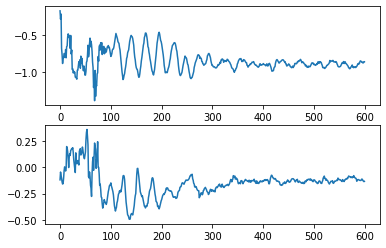

In [36]:
fig, ax = plt.subplots(2)
t = [i for i in range(0,len(the_data))]

xd = [d['x'] for d in the_data]
yd = [d['y'] for d in the_data]
zd = [d['z'] for d in the_data]
ax[0].plot(t,xd)
ax[1].plot(t,yd)



In [19]:
signal = xd

dt = (506945.0 - 503567.0) / 1e6 

n = len(xd)
fhat = np.fft.fft(signal, n) #computes the fft
psd = fhat * np.conj(fhat)/n
freq = (1/(dt*n)) * np.arange(n) #frequency array
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32) #first half index

In [20]:
len(fhat)

500

In [53]:
psd[:10]

array([4.91693433e+02+0.j, 9.43854526e-02+0.j, 2.37589291e-01+0.j,
       2.09704059e-01+0.j, 8.67312388e-01+0.j, 4.87573403e-01+0.j,
       2.12656381e-01+0.j, 1.79771606e-01+0.j, 2.84279029e-01+0.j,
       2.97519591e-01+0.j])

In [55]:
abs(fhat[:10])

array([543.15380859,   7.52537518,  11.93958018,  11.21706001,
        22.81200195,  17.1039189 ,  11.29574384,  10.38570958,
        13.06014614,  13.36082911])

In [51]:
float(the_data[44]['time'].split("-")[2])

438545.0

In [1]:
def get_fft(signal_data, from_idx, to_idx, xyz ='x'):
    # get the time step by reading the microsecs in timestamp
    from_usecs = float(signal_data[from_idx]['time'].split("-")[2])
    next_usecs = float(signal_data[from_idx+1]['time'].split("-")[2])
    dt=(from_usecs/next_usecs)/1e6
    n=to_idx - from_idx
    signal = [i[xyz] for i in signal_data[from_idx:to_idx]]
    fhat = np.fft.fft(signal, n) #computes the fft
    psd = fhat * np.conj(fhat)/n
    freq = (1/(dt*n)) * np.arange(n) #frequency array
    
    return {"horiz":freq,"vert":psd}
    

In [55]:
pdata = get_fft(the_data,0,600,xyz="z")

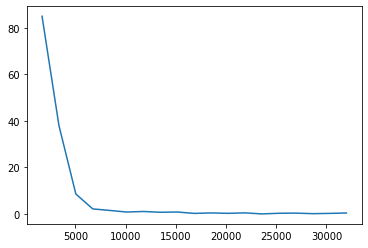

In [57]:
fig, ax = plt.subplots(1)
ax.plot(pdata['horiz'][1:20],pdata['vert'][1:20])

In [37]:
freq

array([  0.        ,   0.49338859,   0.98677719,   1.48016578,
         1.97355437,   2.46694296,   2.96033156,   3.45372015,
         3.94710874,   4.44049734,   4.93388593,   5.42727452,
         5.92066311,   6.41405171,   6.9074403 ,   7.40082889,
         7.89421749,   8.38760608,   8.88099467,   9.37438326,
         9.86777186,  10.36116045,  10.85454904,  11.34793764,
        11.84132623,  12.33471482,  12.82810341,  13.32149201,
        13.8148806 ,  14.30826919,  14.80165779,  15.29504638,
        15.78843497,  16.28182356,  16.77521216,  17.26860075,
        17.76198934,  18.25537794,  18.74876653,  19.24215512,
        19.73554371,  20.22893231,  20.7223209 ,  21.21570949,
        21.70909809,  22.20248668,  22.69587527,  23.18926386,
        23.68265246,  24.17604105,  24.66942964,  25.16281824,
        25.65620683,  26.14959542,  26.64298401,  27.13637261,
        27.6297612 ,  28.12314979,  28.61653839,  29.10992698,
        29.60331557,  30.09670416,  30.59009276,  31.08

In [46]:
len(freq)

600

In [49]:
abs(psd[0])

491.69343298316005

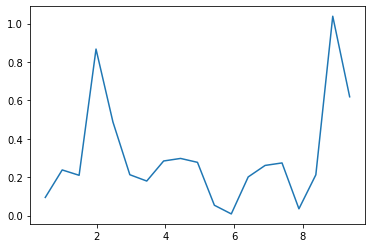

In [50]:
fig, ax = plt.subplots(1)
ax.plot(freq[1:20],psd[1:20])

In [51]:
the_data = get_stream_data(1200)
the_data[-1]

{'x': -0.389404296875,
 'y': -0.345703125,
 'z': -0.805908203125,
 'time': '23-55-837942'}

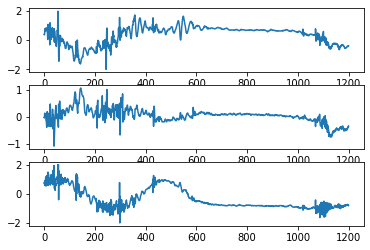

In [52]:
fig, ax = plt.subplots(3)
t = [i for i in range(0,len(the_data))]

xd = [d['x'] for d in the_data]
yd = [d['y'] for d in the_data]
zd = [d['z'] for d in the_data]
ax[0].plot(t,xd)
ax[1].plot(t,yd)
ax[2].plot(t,zd)

## Having a look at ZoomFFT
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ZoomFFT.html



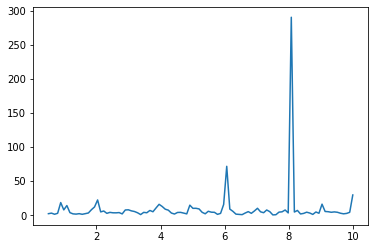

In [53]:
from scipy.signal import ZoomFFT

#x = np.cos(2*np.pi*15*t) + np.sin(2*np.pi*17*t)
dd = [d['z'] for d in the_data[0:600]]

sample_time = float(the_data[1]['time'].split('-')[2]) - float(the_data[0]['time'].split('-')[2]) /1e6
sfreq= 1/sample_time

plot_width = 100


f1, f2 = 0.5, 10
transform = ZoomFFT(len(dd), [f1, f2], plot_width)#, fs=sfreq)
X = transform(dd)
f = np.linspace(f1, f2, plot_width)
import matplotlib.pyplot as plt
#plt.plot(f, 20*np.log10(np.abs(X)))
plt.plot(f, np.abs(X))
plt.show()